This notebook contains exercises related to Capstone Project 1.

Instacart data structure:
   - orders: list of all orders in the dataset. 1 row per order, includes day of the week and time of the day;
   - order_products train: which products (product_id) were ordered; in which order products were added to the cart, and if the product is re-order (1) or not (0);
   - contain the names of products with their corresponding product_id;
   - the structure is the same as order_product_train.csv;
   - aisles contains the aisles;
   - departments: contains the department names.

In [1]:
# We import the needed packages.
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import csv

In [2]:
# Strings to replace names of files.
str_isles = 'aisles.csv'
str_dept = 'departments.csv'
str_prod = 'products.csv'
str_prod_train = 'order_products_train.csv'
str_prod_prior = 'order_products_prior.csv'
str_orders = 'orders.csv'

For the isles frame, we change these into categories.

In [3]:
fr_isles = pd.read_csv(str_isles, index_col='aisle_id')
fr_isles['aisle'].astype('category')
fr_isles.info()

FileNotFoundError: [Errno 2] File b'aisles.csv' does not exist: b'aisles.csv'

We change the type of the department data to category.

In [9]:
fr_dept = pd.read_csv(str_dept, index_col='department_id')
fr_dept.department.astype('category')

department_id
1              frozen
2               other
3              bakery
4             produce
5             alcohol
6       international
7           beverages
8                pets
9     dry goods pasta
10               bulk
11      personal care
12       meat seafood
13             pantry
14          breakfast
15       canned goods
16         dairy eggs
17          household
18             babies
19             snacks
20               deli
21            missing
Name: department, dtype: category
Categories (21, object): [alcohol, babies, bakery, beverages, ..., personal care, pets, produce, snacks]

In [10]:
new_labels = ['product_id','product', 'aisle', 'dept']
fr_prod = pd.read_csv(str_prod, index_col='product_id', names=new_labels)
fr_prod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49689 entries, product_id to 49688
Data columns (total 3 columns):
product    49689 non-null object
aisle      49689 non-null object
dept       49689 non-null object
dtypes: object(3)
memory usage: 776.4+ KB


In [11]:
fr_p_train = pd.read_csv(str_prod_train, index_col='order_id')
fr_p_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384617 entries, 1 to 3421070
Data columns (total 3 columns):
product_id           1384617 non-null int64
add_to_cart_order    1384617 non-null int64
reordered            1384617 non-null int64
dtypes: int64(3)
memory usage: 42.3 MB


In [8]:
fp_p_read = pd.read_csv(str_prod_prior, nrows=1000000, index_col='order_id')
fp_p_prior = pd.DataFrame(fp_p_read)
fp_p_prior.head()

,product_id,add_to_cart_order,reordered
order_id,,,
2,33120,1,1
2,28985,2,1
2,9327,3,0
2,45918,4,1
2,30035,5,0


We change eval_set to category. The column has only three values.

In [12]:
fp_orders = pd.read_csv(str_orders, index_col='order_id')
fp_orders.eval_set.astype('category')
fp_orders.head()


,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,,,,,,
2539329,1,prior,1,2,8,NaN
2398795,1,prior,2,3,7,15.0
473747,1,prior,3,3,12,21.0
2254736,1,prior,4,4,7,29.0
431534,1,prior,5,4,15,28.0


AttributeError: 'AxesSubplot' object has no attribute 'head'

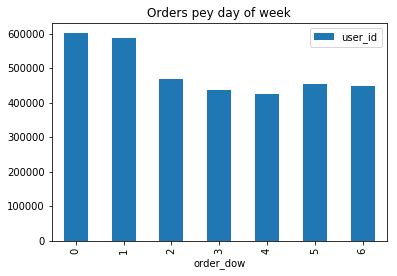

In [13]:
fp_groupped = fp_orders.groupby('order_dow').count().plot(kind='bar',y='user_id', title='Orders pey day of week')

fp_groupped.head()

We check to see data in hourly categories.

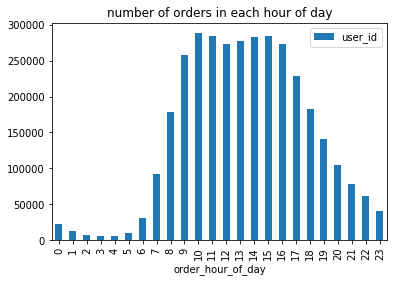

In [12]:
#graphing dayly activities per hour.
fp_orders.groupby('order_hour_of_day').count().plot(kind='bar', y='user_id', title='number of orders in each hour of day')

 We visualize data for inspection.
 
 We see that all orders for 30 days or more are aggregated into a single column.

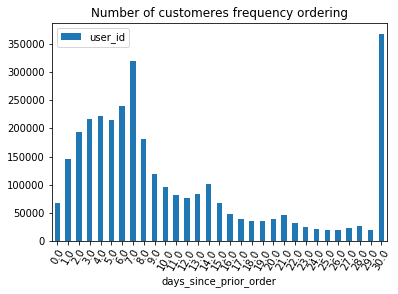

In [15]:
#grouping ordres according to days since prior order
fp_orders.groupby('days_since_prior_order').count().plot(kind='bar', rot=60
                                                         , y='user_id', title='Number of customeres frequency ordering')

We cannot work on pattern where the days are 30 or more, because all orders are aggregated. We are separating these orders from set.

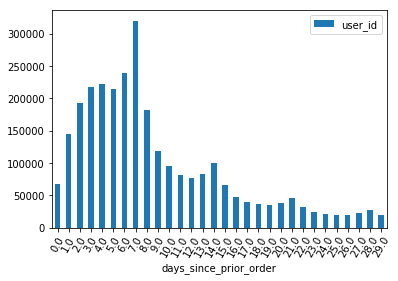

In [10]:
# dropping all observation where days since prior order is 30.
fp_orders_29 = fp_orders.loc[fp_orders['days_since_prior_order'] < 30]
fp_orders_30 = fp_orders.loc[fp_orders['days_since_prior_order']>=30]
fp_orders_29.groupby('days_since_prior_order').count().plot(kind='bar',rot=60, y='user_id')

We save orders in two separate files for further processing: orders_29.csv and orders_30.csv. 

The first file contains all data for orders that are reordes 29 days or less after a prior order. 

The other file contains all orders that are 30 days or more after the previous order.

In [20]:
# saving the separated data in two files for processing
# orders_29.csv and orders_30.csv
fp_orders_29.to_csv('orders_29.csv')
fp_orders_30.to_csv('orders_30.csv')
